#!pip install gensim
#!pip install nltk
from gensim.models import Word2Vec
from nltk import sent_tokenize
from nltk import word_tokenize
import nltk
nltk.download('punkt')

In [55]:
text = "This is a sentence that helps explain vectors. Now it is follow ed by a secoond sentence. And then a  third one will be here."


In [24]:
word_list = set(text.replace(".",'').lower().split())

In [25]:
word_list

{'a',
 'and',
 'be',
 'by',
 'ed',
 'explain',
 'follow',
 'helps',
 'here',
 'is',
 'it',
 'now',
 'one',
 'secoond',
 'sentence',
 'that',
 'then',
 'third',
 'this',
 'vectors',
 'will'}

In [27]:
tokens =  [i.replace(".",'').lower().split() for i in sent_tokenize(text)]

In [28]:
tokens

[['this', 'is', 'a', 'sentence', 'that', 'helps', 'explain', 'vectors'],
 ['now', 'it', 'is', 'follow', 'ed', 'by', 'a', 'secoond', 'sentence'],
 ['and', 'then', 'a', 'third', 'one', 'will', 'be', 'here']]

In [30]:
test_vector = Word2Vec(tokens, min_count = 1, window = 3, workers = 1, size =  2, seed = 1, sg = 1)


In [34]:
test_vector.wv.most_similar('sentence')

[('a', 0.9876329898834229),
 ('then', 0.9818997383117676),
 ('ed', 0.9493247270584106),
 ('be', 0.9376769661903381),
 ('is', 0.9356743097305298),
 ('one', 0.905025839805603),
 ('helps', 0.5826073884963989),
 ('explain', 0.5279557704925537),
 ('secoond', 0.2788084149360657),
 ('and', 0.10020840167999268)]

In [36]:
test_vector.wv.most_similar('will')

[('that', 0.9984194040298462),
 ('and', 0.9919298887252808),
 ('here', 0.970976710319519),
 ('helps', 0.7968782782554626),
 ('follow', 0.18959257006645203),
 ('vectors', 0.1316404938697815),
 ('sentence', -0.02674981951713562),
 ('this', -0.10734695196151733),
 ('a', -0.18314602971076965),
 ('then', -0.21559932827949524)]

In [38]:
test_vector.train(sentences = tokens, total_examples = 3, epochs = 10)

(43, 250)

In [30]:
test_vector[test_vector.wv.vocab][0]

C:\Users\macia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.8864396, -2.6356008], dtype=float32)

## Playing with the test dataset


In [2]:
import numpy as np
import pandas as pd
import emoji
import nltk
from nltk import sent_tokenize
from nltk  import word_tokenize
from nltk.corpus import stopwords

In [3]:
path = "/Users/macia/Documents/MSIA-21/IRL-MSIA/datasets_483_982_spam.csv"

with open(path) as file:
    data = pd.read_csv(file)
data



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.columns = ["class","text", "none","none","none"]

data = data[["class","text"]]

data

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.shape

(5572, 2)

In [5]:
data.dtypes

class    object
text     object
dtype: object

In [8]:
data.isnull().sum()

class    0
text     0
dtype: int64

In [16]:
text = data['text']

In [18]:
tokens = list(data['text'].replace(",",'').str.lower().apply(word_tokenize))


In [19]:
tokens

[['go',
  'until',
  'jurong',
  'point',
  ',',
  'crazy..',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  '...',
  'cine',
  'there',
  'got',
  'amore',
  'wat',
  '...'],
 ['ok', 'lar', '...', 'joking', 'wif', 'u', 'oni', '...'],
 ['free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005.',
  'text',
  'fa',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'question',
  '(',
  'std',
  'txt',
  'rate',
  ')',
  't',
  '&',
  'c',
  "'s",
  'apply',
  '08452810075over18',
  "'s"],
 ['u',
  'dun',
  'say',
  'so',
  'early',
  'hor',
  '...',
  'u',
  'c',
  'already',
  'then',
  'say',
  '...'],
 ['nah',
  'i',
  'do',
  "n't",
  'think',
  'he',
  'goes',
  'to',
  'usf',
  ',',
  'he',
  'lives',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  "'s",
  'been',
  '3',
  'week',
  "'s",
  'now',
 

In [23]:
test_vector = Word2Vec(tokens, min_count = 1, window = 3, workers = 1, size =  2, seed = 1, sg = 1)

In [24]:
test_vector.wv.most_similar('sex')

[('user', 1.0),
 ('tones', 1.0),
 ('offer', 1.0),
 ('every', 1.0),
 ('guidance', 1.0),
 ('stands', 1.0),
 ('street', 1.0),
 ('k.', 0.9999999403953552),
 ('kath', 0.9999999403953552),
 ('1er', 0.9999999403953552)]

In [26]:
test_vector.wv.most_similar('class')

[('wet', 1.0),
 ('ink', 1.0),
 ('vikky', 1.0),
 ('bday', 0.9999999403953552),
 ('tick', 0.9999999403953552),
 ('cars', 0.9999998807907104),
 ('ig11', 0.9999998807907104),
 ('busy', 0.9999998807907104),
 ('courtroom', 0.9999998807907104),
 ('0825', 0.9999998807907104)]

In [28]:
test_vector.wv.most_similar('home')

[('perumbavoor', 1.0),
 ('åôrents', 1.0),
 ('royal', 0.9999997615814209),
 ('wat..', 0.9999997019767761),
 ('prince..gn', 0.9999995231628418),
 ('//img', 0.9999989867210388),
 ('wat', 0.9999989867210388),
 ('sptv', 0.9999989867210388),
 ('sunoco', 0.9999983310699463),
 ('informed.rgds', 0.9999982118606567)]

In [29]:
test_vector.train(sentences = tokens, total_examples = 3, epochs = 10)

(785457, 1029000)

In [31]:
test_vector[test_vector.wv.vocab][0]

C:\Users\macia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.8864396, -2.6356008], dtype=float32)

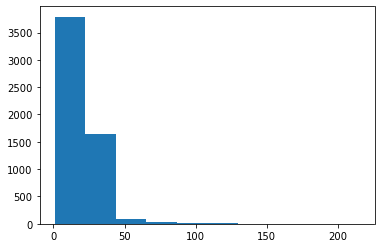

In [35]:
from matplotlib import pyplot as plt
word_lengths = [len(w) for w in tokens]

plt.hist(word_lengths)
plt.show()